In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.optim import lr_scheduler

In [2]:
from scripts.mnistParity import MNISTParity
from scripts.architecture import MLP
from scripts.train_utils import accuracy
from scripts.train import train_epoch, train_model, test_model
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.3


## Create Parity Data Iterator

### Vertical

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_fn = torch.nn.CrossEntropyLoss()

### For k = 1

In [8]:
k=1
model = MLP(k, "ReLU")
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 14117.3251 - average: 0.2353; Performance: 0.9109
TESTING - loss 1465.7739475369453 - performance 0.9472
Epoch 2 completed. Loss - total: 7046.7171 - average: 0.1174; Performance: 0.9608
TESTING - loss 997.5868687033653 - performance 0.9657
Epoch 3 completed. Loss - total: 5322.7645 - average: 0.0887; Performance: 0.9702
TESTING - loss 803.9961084723473 - performance 0.9724
Epoch 4 completed. Loss - total: 4423.6267 - average: 0.0737; Performance: 0.9750
TESTING - loss 695.4796127974987 - performance 0.9757
Epoch 5 completed. Loss - total: 3836.5102 - average: 0.0639; Performance: 0.9784
TESTING - loss 626.0254830121994 - performance 0.9785
Epoch 6 completed. Loss - total: 3409.3766 - average: 0.0568; Performance: 0.9813
TESTING - loss 577.2102829068899 - performance 0.9799
Epoch 7 completed. Loss - total: 3078.3429 - average: 0.0513; Performance: 0.9836
TESTING - loss 542.1436578035355 - performance 0.9814
Epoch 8 completed. Loss - t

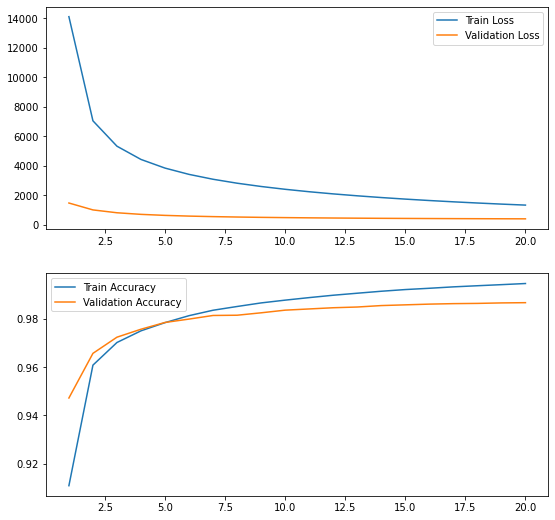

In [9]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

In [11]:
k = 3

model3 = MLP(k,"ReLU")
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList3, trainAccList3, valLossList3, valAccList3  = train_model(model3, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41902.3686 - average: 0.6984; Performance: 0.5028
TESTING - loss 6930.2802085876465 - performance 0.5101
Epoch 2 completed. Loss - total: 41200.6007 - average: 0.6867; Performance: 0.5392
TESTING - loss 6768.124043941498 - performance 0.5673
Epoch 3 completed. Loss - total: 39697.9904 - average: 0.6616; Performance: 0.5986
TESTING - loss 6458.200037479401 - performance 0.6191
Epoch 4 completed. Loss - total: 37747.1114 - average: 0.6291; Performance: 0.6441
TESTING - loss 6124.160468578339 - performance 0.6622
Epoch 5 completed. Loss - total: 36111.1718 - average: 0.6019; Performance: 0.6675
TESTING - loss 5853.3935546875 - performance 0.6754
Epoch 6 completed. Loss - total: 34926.4285 - average: 0.5821; Performance: 0.6812
TESTING - loss 5687.686204910278 - performance 0.6923
Epoch 7 completed. Loss - total: 34024.8354 - average: 0.5671; Performance: 0.6935
TESTING - loss 5592.389941215515 - performance 0.7018
Epoch 8 completed. Loss

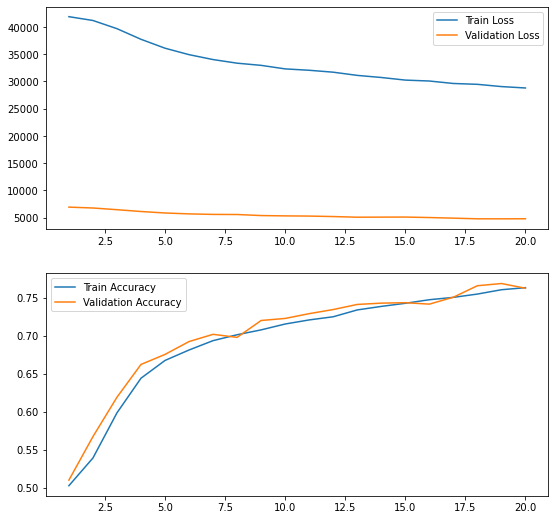

In [12]:
plot_loss_accuracy(trainLostList3,valLossList3,trainAccList3,valAccList3,num_epochs)

In [20]:
## Plain SGD didn't learn
## Tried with different parameters for momentum, dampening and nesterov, it didn't learn

k = 3
model4 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList4, trainAccList4, valLossList4, valAccList4  = train_model(model4, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41806.5330 - average: 0.6968; Performance: 0.5035
TESTING - loss 6914.251267910004 - performance 0.5184
Epoch 2 completed. Loss - total: 40747.1005 - average: 0.6791; Performance: 0.5498
TESTING - loss 6568.245232105255 - performance 0.5922
Epoch 3 completed. Loss - total: 37740.3164 - average: 0.6290; Performance: 0.6316
TESTING - loss 6009.2533230781555 - performance 0.6453
Epoch 4 completed. Loss - total: 35326.3726 - average: 0.5888; Performance: 0.6683
TESTING - loss 5835.963189601898 - performance 0.6713
Epoch 5 completed. Loss - total: 34393.2434 - average: 0.5732; Performance: 0.6814
TESTING - loss 5653.347074985504 - performance 0.6891
Epoch 6 completed. Loss - total: 33633.4789 - average: 0.5606; Performance: 0.6913
TESTING - loss 5581.276476383209 - performance 0.7008
Epoch 7 completed. Loss - total: 33192.9681 - average: 0.5532; Performance: 0.6982
TESTING - loss 5511.049330234528 - performance 0.6898
Epoch 8 completed. Lo

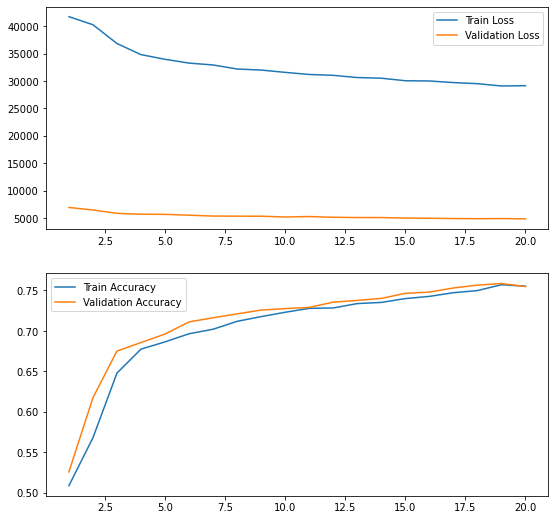

In [15]:
plot_loss_accuracy(trainLostList4,valLossList4,trainAccList4,valAccList4,num_epochs)

Activation: ReLU
Training on cuda:0
Epoch 1 completed. Loss - total: 41935.6996 - average: 0.6989; Performance: 0.5019
TESTING - loss 6940.747916698456 - performance 0.5080
Epoch 2 completed. Loss - total: 41379.9863 - average: 0.6897; Performance: 0.5266
TESTING - loss 6825.603604316711 - performance 0.5481
Epoch 3 completed. Loss - total: 40103.1800 - average: 0.6684; Performance: 0.5879
TESTING - loss 6520.933270454407 - performance 0.6132
Epoch 4 completed. Loss - total: 37977.0562 - average: 0.6330; Performance: 0.6435
TESTING - loss 6120.846211910248 - performance 0.6605
Epoch 5 completed. Loss - total: 36126.3197 - average: 0.6021; Performance: 0.6683
TESTING - loss 5854.205071926117 - performance 0.6769
Epoch 6 completed. Loss - total: 34814.4447 - average: 0.5802; Performance: 0.6845
TESTING - loss 5685.836672782898 - performance 0.6920
Epoch 7 completed. Loss - total: 33978.9275 - average: 0.5663; Performance: 0.6948
TESTING - loss 5568.406939506531 - performance 0.7063
Epoch

Epoch 20 completed. Loss - total: 41716.3473 - average: 0.6953; Performance: 0.5063
TESTING - loss 6947.243630886078 - performance 0.4985
Activation: ReLU features
Training on cuda:0
Epoch 1 completed. Loss - total: 41908.7190 - average: 0.6985; Performance: 0.4986
TESTING - loss 6959.680259227753 - performance 0.5044
Epoch 2 completed. Loss - total: 41768.4434 - average: 0.6961; Performance: 0.5023
TESTING - loss 6950.169622898102 - performance 0.5012
Epoch 3 completed. Loss - total: 41737.0775 - average: 0.6956; Performance: 0.4996
TESTING - loss 6951.2311816215515 - performance 0.5046
Epoch 4 completed. Loss - total: 41718.7859 - average: 0.6953; Performance: 0.4981
TESTING - loss 6944.839417934418 - performance 0.5036
Epoch 5 completed. Loss - total: 41692.1520 - average: 0.6949; Performance: 0.4995
TESTING - loss 6944.9357986450195 - performance 0.4995
Epoch 6 completed. Loss - total: 41665.3686 - average: 0.6944; Performance: 0.5037
TESTING - loss 6935.609757900238 - performance 

Epoch 19 completed. Loss - total: 29663.0527 - average: 0.4944; Performance: 0.7488
TESTING - loss 4810.183525085449 - performance 0.7577
Epoch 20 completed. Loss - total: 29391.6316 - average: 0.4899; Performance: 0.7547
TESTING - loss 5009.712964296341 - performance 0.7462


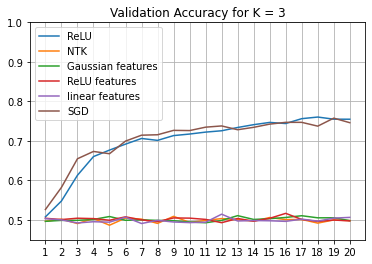

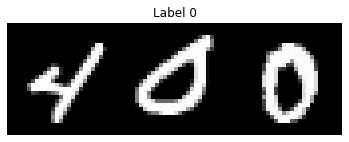

In [26]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20

fig = plt.figure()
for activation in ["ReLU", "NTK", "Gaussian features", "ReLU features", "linear features", "SGD"]:
    model = MLP(K, activation)

    if "features" in activation:
        # deactivate the first layer
        optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
    elif "NTK" in activation:
        paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
        optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
    elif "SGD" in activation:
        optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate, weight_decay=0.001)
    else:
        optimizer = torch.optim.Adadelta(model.parameters(), lr = learn_rate, weight_decay=0.001)

    print("Activation:",activation)

    trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_fn, optimizer, num_epochs, 
                                                                        batch_size, validate_model = True, performance=accuracy, 
                                                                        device="cuda:0", lr_scheduler=None)

    plotValAccuracy(valAccList,num_epochs, activation, K)

fig.savefig(str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# just need to find good lr and weight_decay values for lazy methods to have more similar plots to paper
